In [4]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

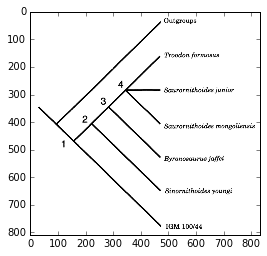

In [5]:
img = cv2.imread('images/Tree1.png')

plt.imshow(img)

In [6]:
canny = cv2.Canny(img, threshold1=150, threshold2=100)


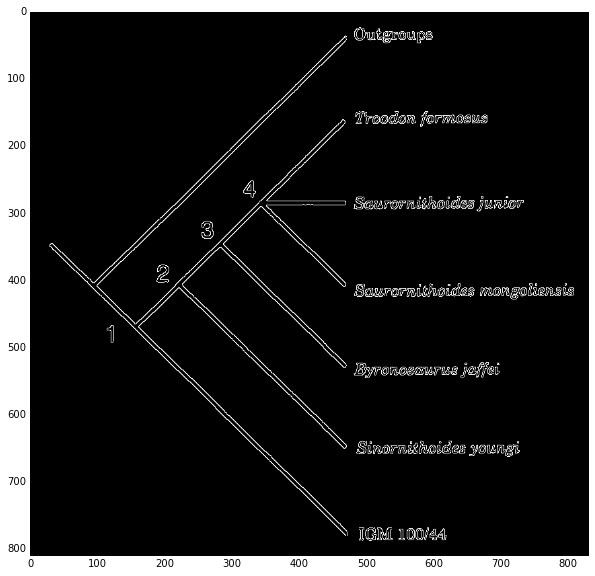

In [7]:
def show(img, cvt=cv2.COLOR_GRAY2RGB, do_cvt=True):
    plt.figure(figsize=(10,10))
    if do_cvt: plt.imshow(cv2.cvtColor(img, cvt))
    else: plt.imshow(img)
    
show(canny)

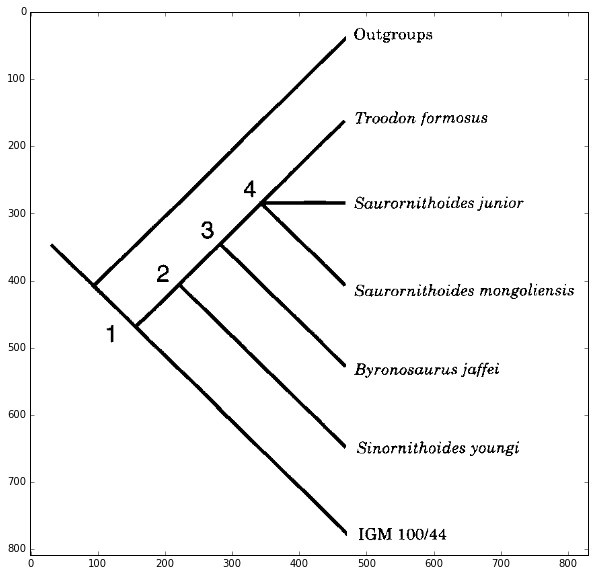

In [8]:
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

show(thresh)

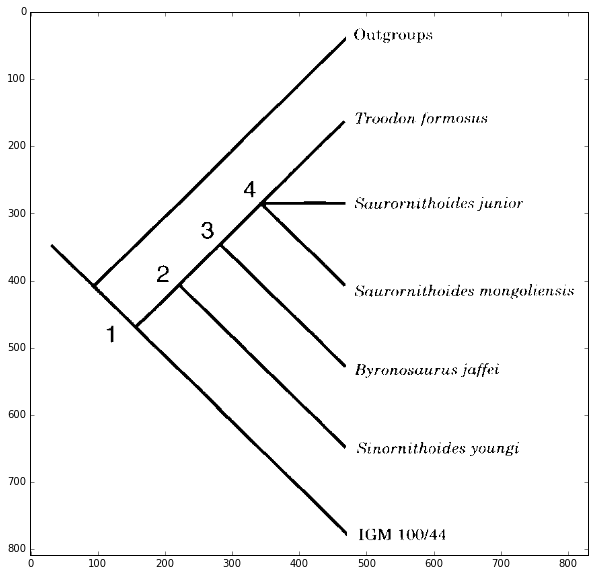

In [9]:
dilated = cv2.dilate(thresh, (20, 20))
show(dilated)

In [10]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

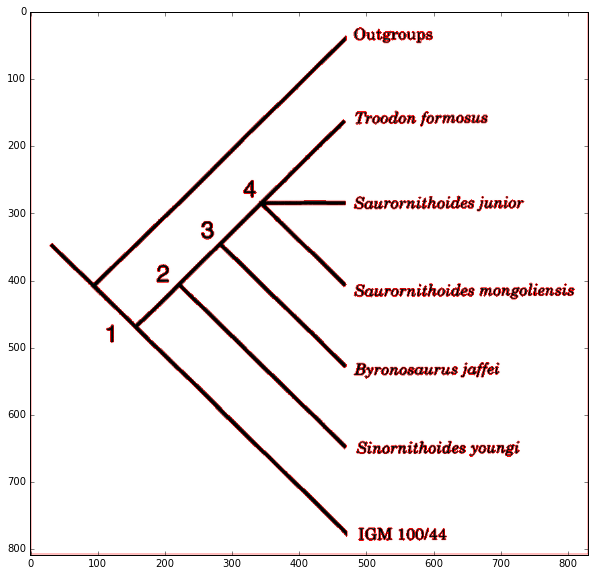

In [11]:
contour_img = np.copy(img)
cv2.drawContours(contour_img, contours, -1, (255,0,0))
show(contour_img, do_cvt=False)

In [12]:


for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    cv2.rectangle(contour_img, (x, y), (x+w, y+h), (255,0,255), 1, 8, 0 );
print bounding_rects

show(contour_img, do_cvt=False)

NameError: name 'bounding_rects' is not defined

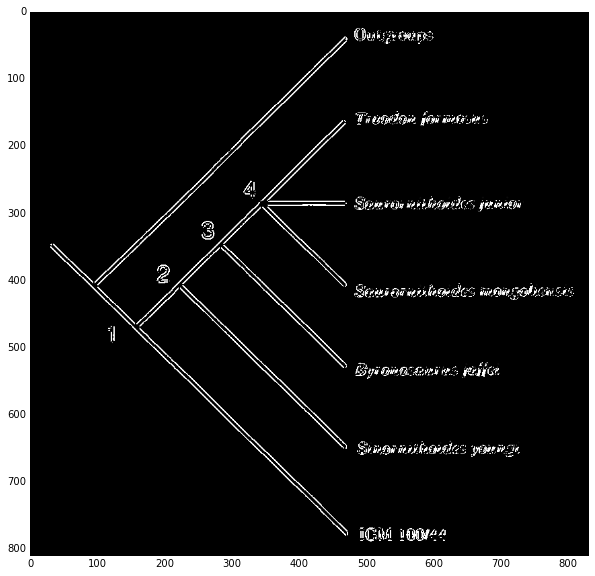

In [13]:
corners = cv2.cornerHarris(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 2, 3, 0.04)
show(corners)

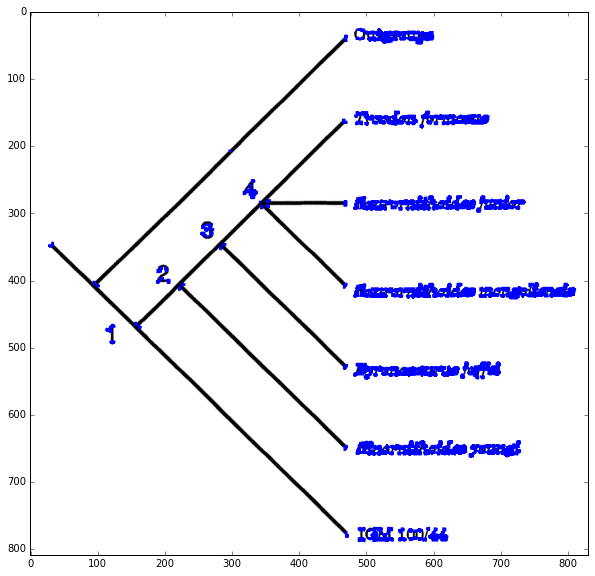

In [14]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4, 3, 0.05)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.05*dst.max()] = [0,0,255]

show(img, False)

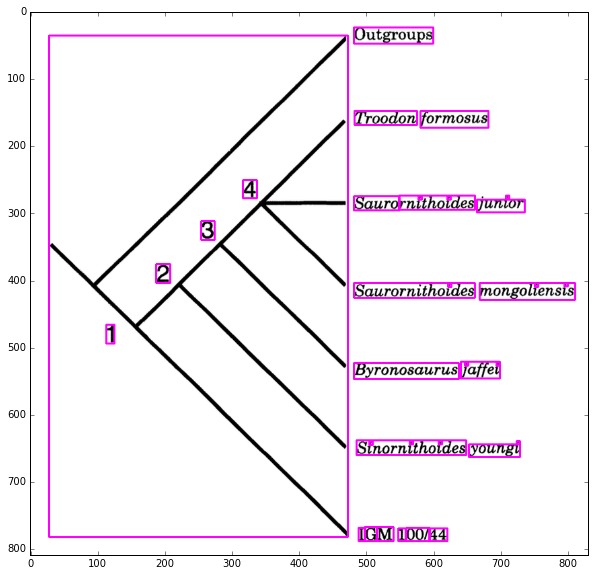

In [21]:
just_tree = cv2.imread("images/Tree1.png")
def text_contours(img, thresh=0.5, kernel=1, iterations=1):
    img = img.copy()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV) # threshold
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    dilated = cv2.dilate(thresh,kernel,iterations) # dilate
    
#     return dilated
    im2, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours
    
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        if h < 5 or w < 5: continue
        #if h > grays[i].shape[0] * 0.5 or w > grays[i].shape[1] * 0.5: continue
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 2)
        
    return img
    
show(text_contours(just_tree), False)
# contours = text_contours(just_tree)

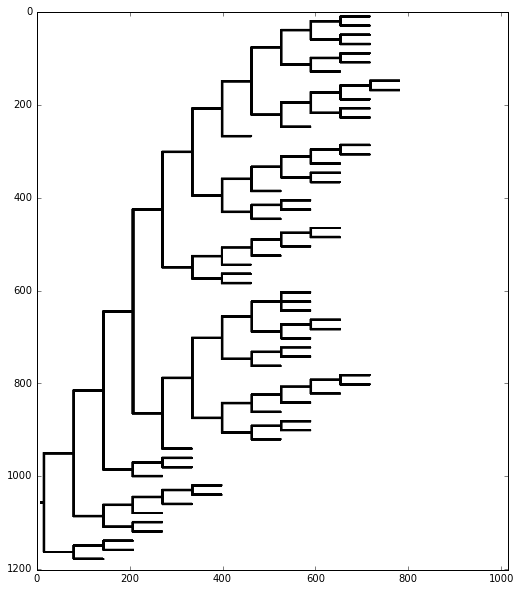

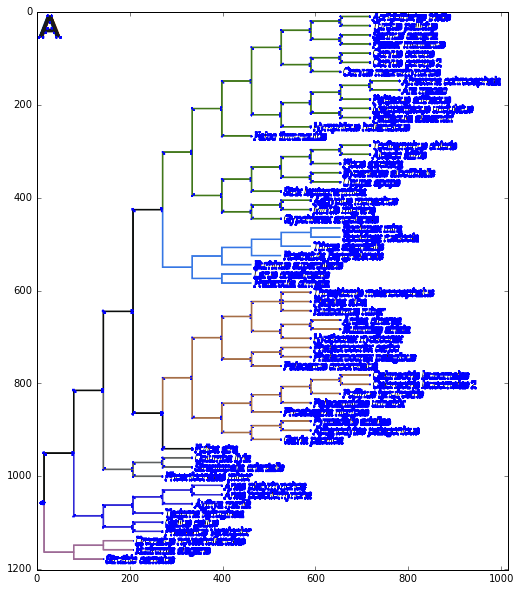

In [16]:
# Find the contour of the tree
def find_tree_contour(gray, param=2):
    _,thresh = cv2.threshold(gray, 192, 255, cv2.THRESH_BINARY_INV) # threshold
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    dilated = cv2.dilate(thresh,kernel,iterations = param) # dilate
    im2, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
    
    out = np.zeros(gray.shape, dtype=np.uint8) + 255
    
    for i, contour in enumerate(contours):
        [x,y,w,h] = cv2.boundingRect(contour)
        if h < gray.shape[0] * 0.5 or w < gray.shape[1] * 0.5: continue
        #cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 1)
        cv2.drawContours(out, contours, i, 0, -1)
    return out

filename="images/Tree2.png"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(find_tree_contour(gray, 1))

_,thresh = cv2.threshold(gray,150,255,0) #cv2.THRESH_BINARY_INV) # threshold 
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4, 3, 0.01)

dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
corners = dst > 0.05 * dst.max()
img[corners] = [0, 0, 255]

points = []
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if corners[y,x]:
            points.append((x,y))

#nodes = tools.nodes_from_points(img, points)

show(img, False)